<a href="https://colab.research.google.com/github/daniyal828/TemperatureTimeSeries/blob/main/TempTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Data manipulation and visualization libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced plotting
import missingno as msno  # For missing values visualization

# Time Series Libraries
from statsmodels.tsa.arima.model import ARIMA  # For ARIMA model
from sklearn.metrics import mean_squared_error  # For error evaluation
from datetime import datetime  # For working with date and time

# Additional Libraries
import warnings  # For controlling warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output


In [71]:
# Load the dataset
df = pd.read_csv('Temp.csv', encoding='ISO-8859-1')  # Adjust encoding if needed

# Show the first few rows of the dataset to check if it's loaded correctly
df.head()


,Temperature - (Celsius),Year,Month
0,7.72768,1901,January
1,8.93600,1901,February
2,16.96320,1901,March
3,21.27410,1901,April
4,26.04970,1901,May


<Figure size 1000x600 with 0 Axes>

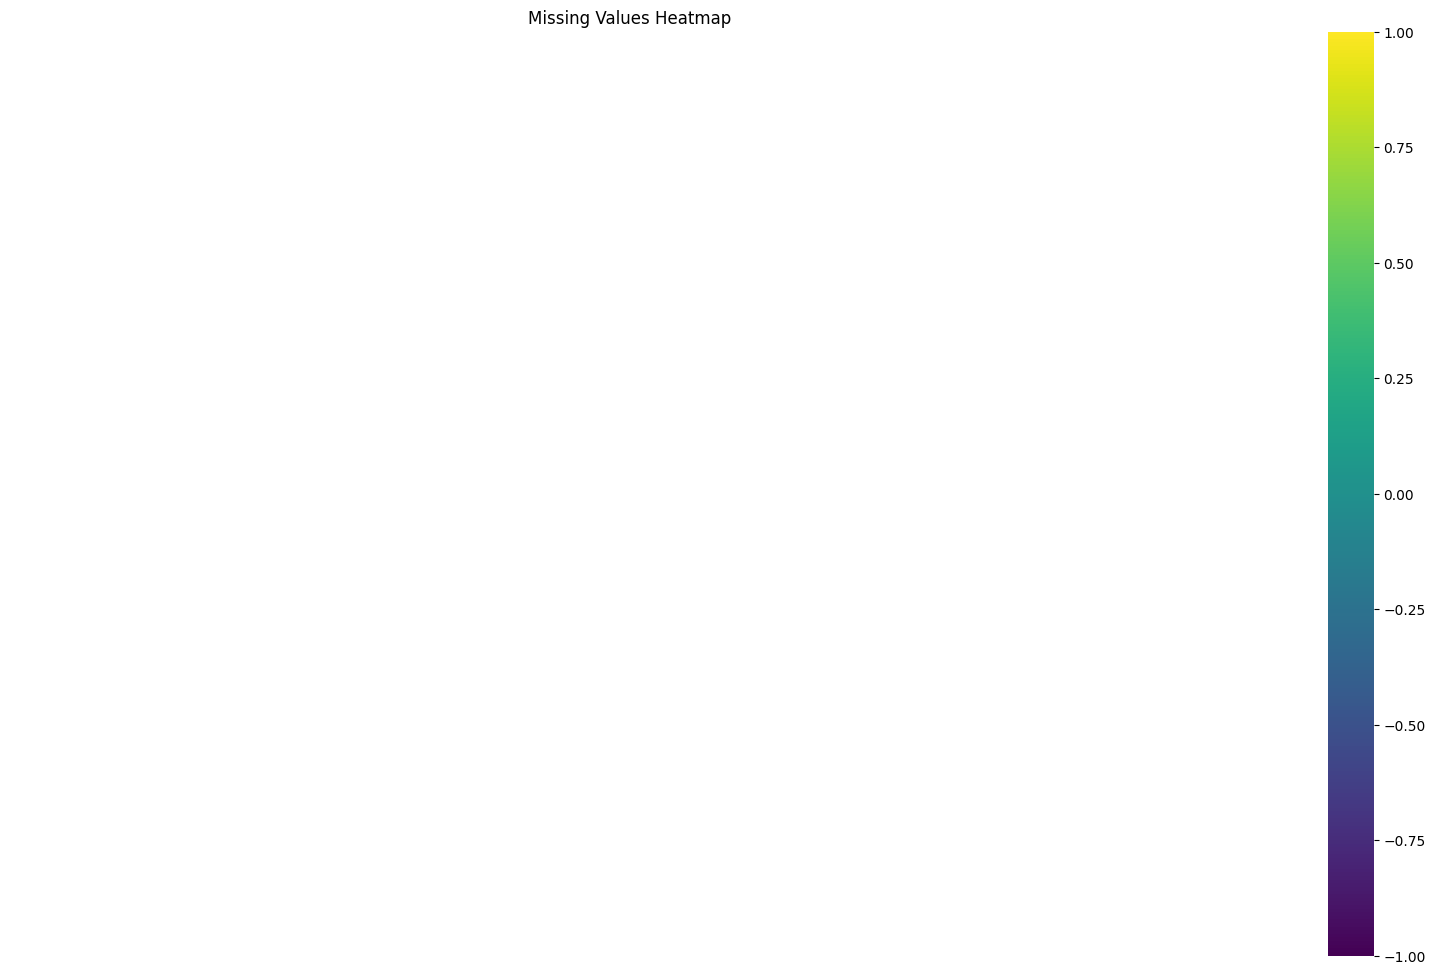

In [72]:
# Visualize missing values heatmap
plt.figure(figsize=(10, 6))
msno.heatmap(df, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [73]:
# Basic summary of the dataset
df.info()  # Data types and non-null counts

# Summary statistics (mean, std, min, max, etc.)
df.describe()  # Summary statistics for numeric features


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  1392 non-null   float64
 1    Year                    1392 non-null   int64  
 2   Month                    1392 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 32.8+ KB


,Temperature - (Celsius),Year
count,1392.000000,1392.000000
mean,20.007129,1958.500000
std,7.377193,33.497105
min,5.913480,1901.000000
25%,13.119875,1929.750000
50%,21.170700,1958.500000
75%,27.211500,1987.250000
max,30.305800,2016.000000


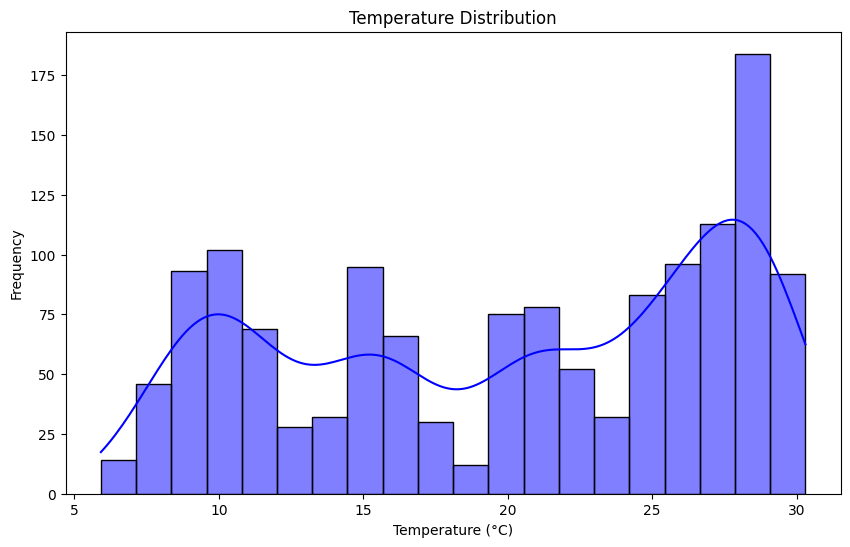

In [74]:
# Distribution of Temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature - (Celsius)'], bins=20, kde=True, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


In [75]:
# Check the data types of each feature in the dataset
df.dtypes


,0
Temperature - (Celsius),float64
Year,int64
Month,object


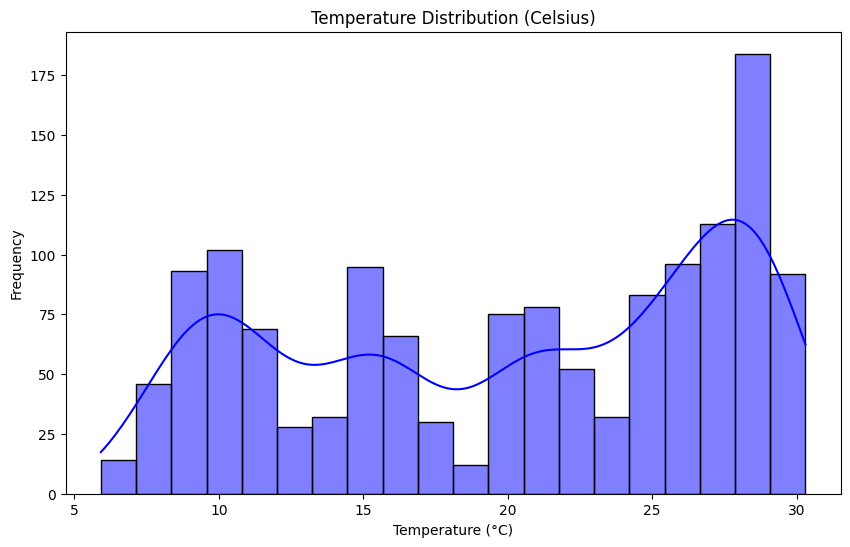

In [76]:
# Histogram of Temperature - (Celsius)
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature - (Celsius)'], bins=20, kde=True, color='blue')
plt.title('Temperature Distribution (Celsius)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


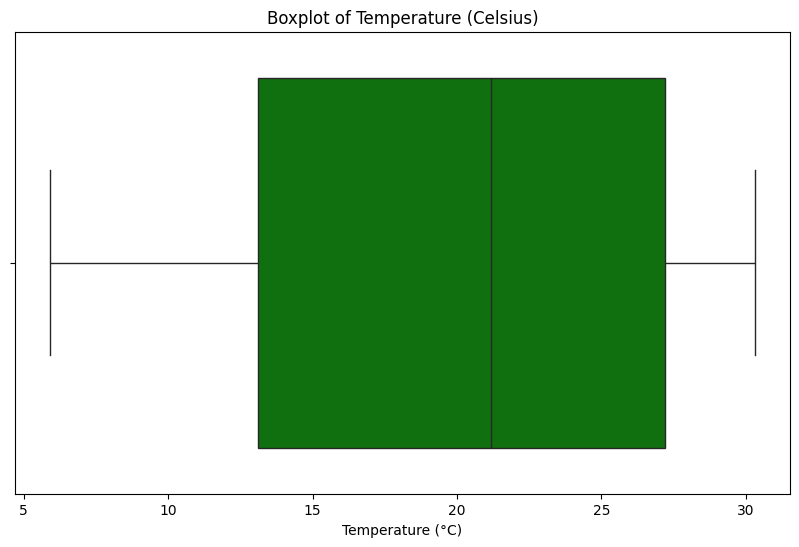

In [77]:
# Boxplot for Temperature - (Celsius)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Temperature - (Celsius)'], color='green')
plt.title('Boxplot of Temperature (Celsius)')
plt.xlabel('Temperature (°C)')
plt.show()


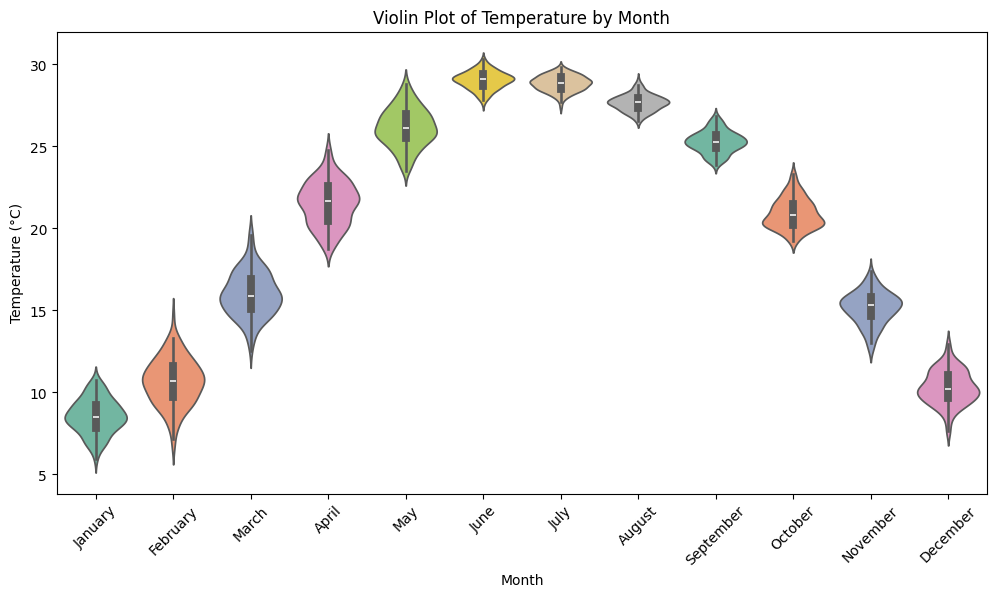

In [78]:
# Violin plot for Temperature by Month
plt.figure(figsize=(12, 6))
sns.violinplot(x='Month', y='Temperature - (Celsius)', data=df, palette='Set2')
plt.title('Violin Plot of Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


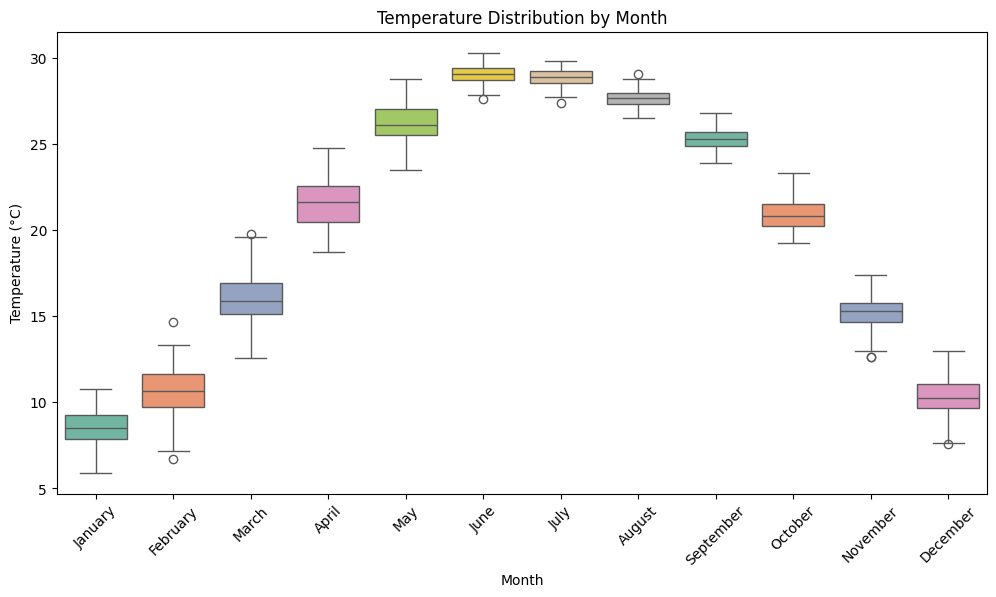

In [79]:
# Boxplot for Temperature by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temperature - (Celsius)', data=df, palette='Set2')
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


In [80]:
df.columns


Index(['Temperature - (Celsius)', ' Year', 'Month'], dtype='object')

In [81]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify that the columns are cleaned
df.columns

Index(['Temperature - (Celsius)', 'Year', 'Month'], dtype='object')

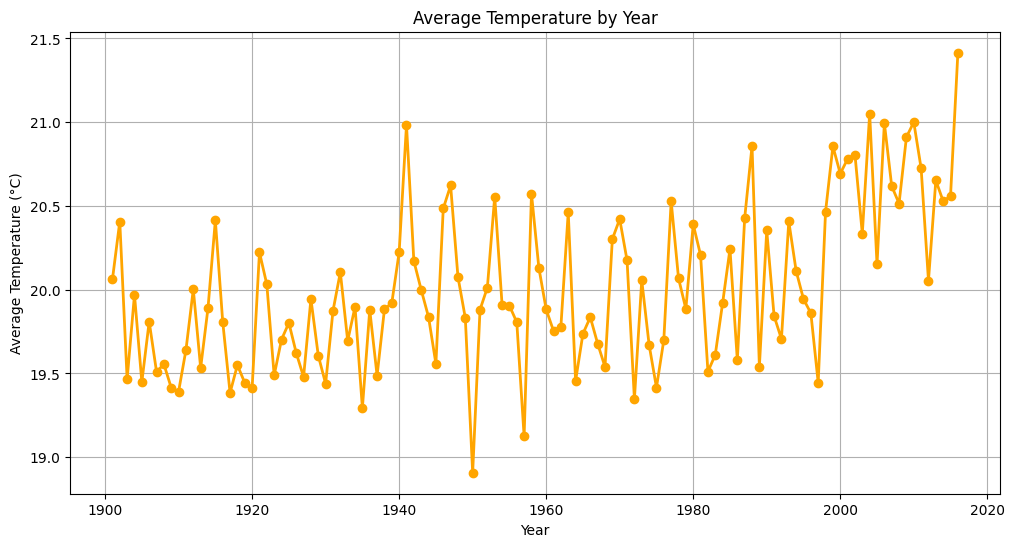

In [82]:
# Plot average temperature per year
yearly_avg_temp = df.groupby('Year')['Temperature - (Celsius)'].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_temp, marker='o', color='orange', linestyle='-', linewidth=2)
plt.title('Average Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()


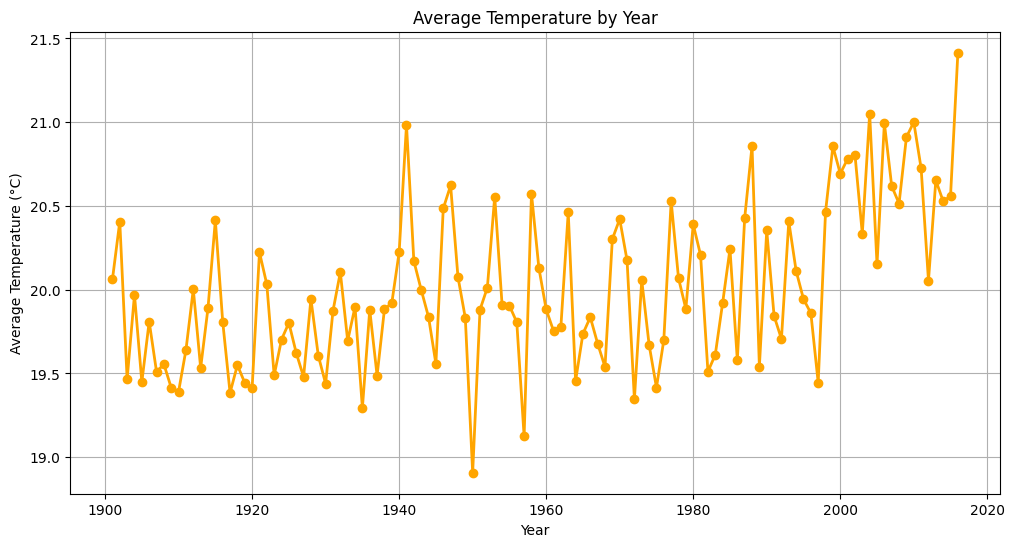

In [83]:
# Plot average temperature per year
yearly_avg_temp = df.groupby('Year')['Temperature - (Celsius)'].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_temp, marker='o', color='orange', linestyle='-', linewidth=2)
plt.title('Average Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()


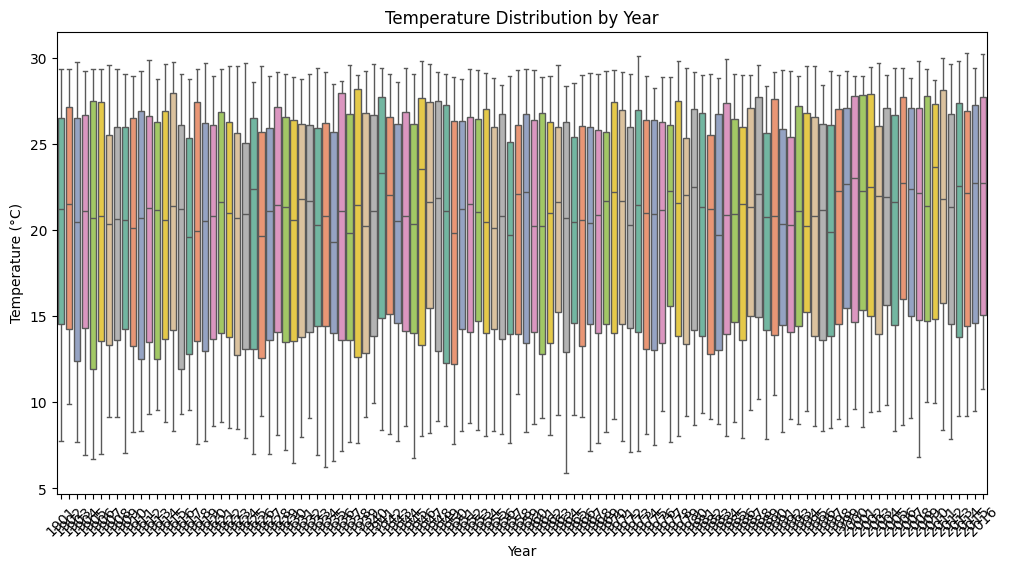

In [84]:
# Boxplot for Temperature by Year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Temperature - (Celsius)', data=df, palette='Set2')
plt.title('Temperature Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


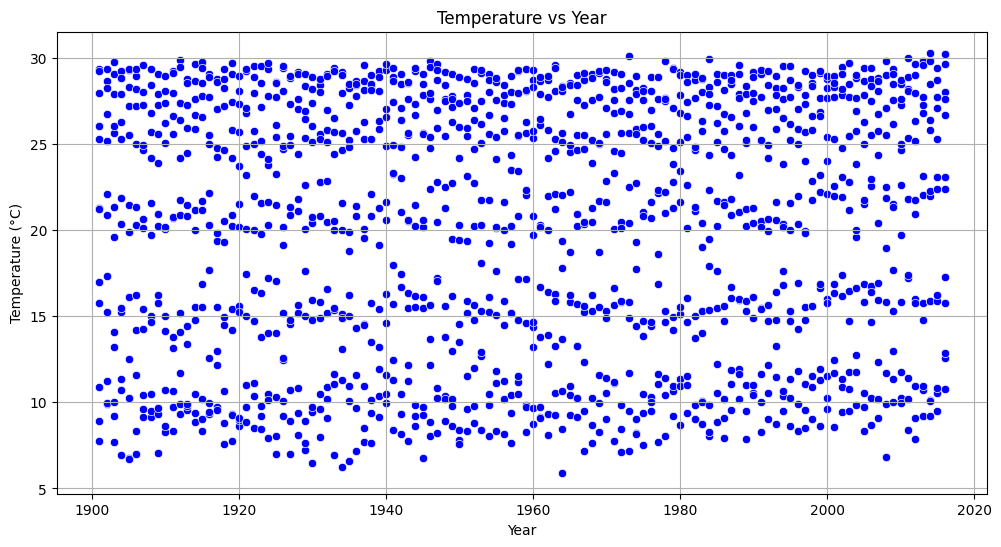

In [85]:
# Scatter plot for Temperature vs. Year
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Temperature - (Celsius)', data=df, color='blue')
plt.title('Temperature vs Year')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


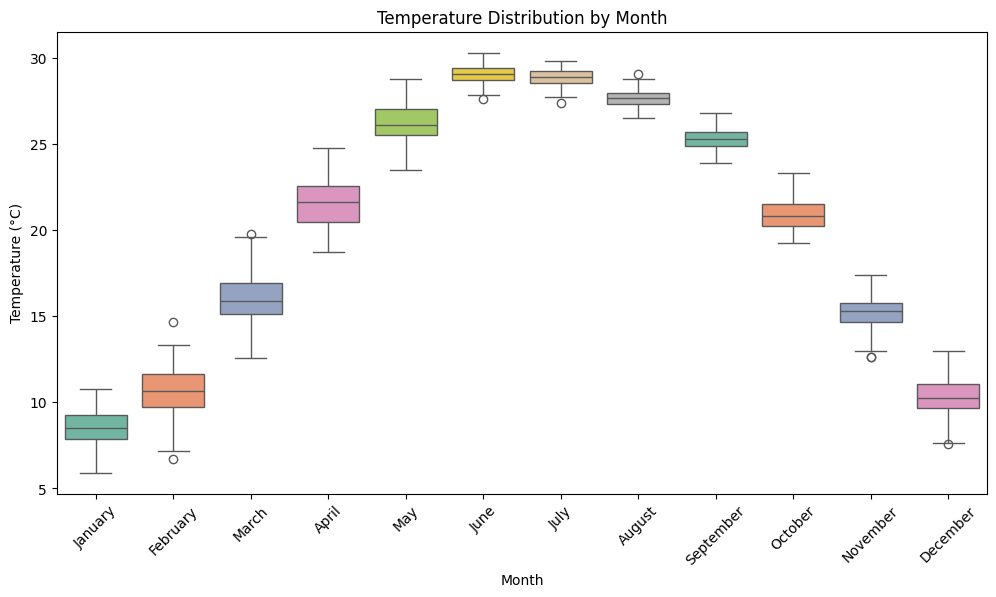

In [86]:
# Boxplot for Temperature by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Temperature - (Celsius)', data=df, palette='Set2')
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


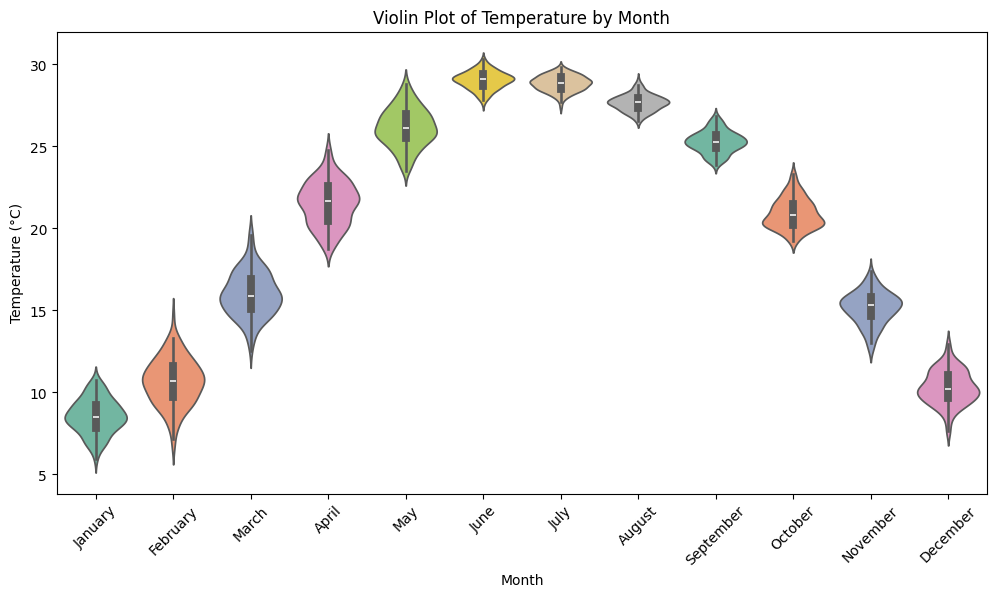

In [87]:
# Violin plot for Temperature by Month
plt.figure(figsize=(12, 6))
sns.violinplot(x='Month', y='Temperature - (Celsius)', data=df, palette='Set2')
plt.title('Violin Plot of Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


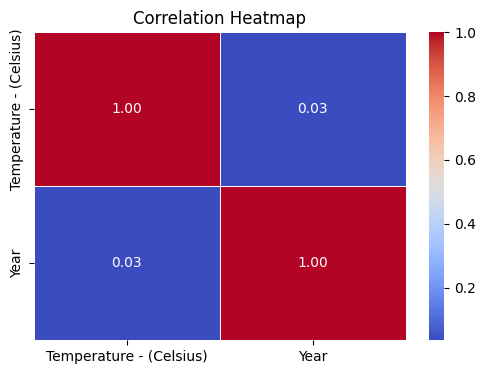

In [88]:
# Correlation heatmap
corr_matrix = df[['Temperature - (Celsius)', 'Year']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


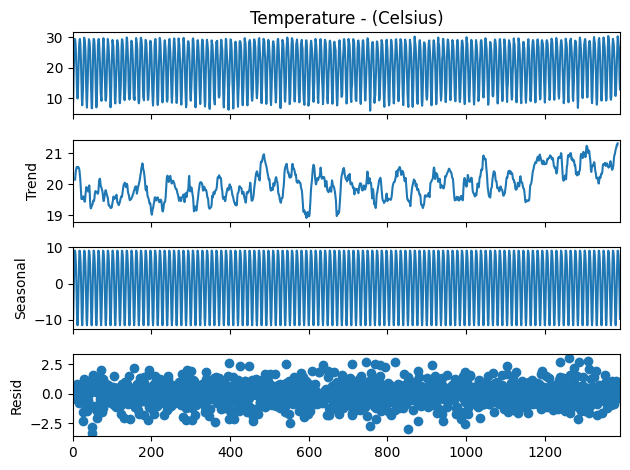

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition
result = seasonal_decompose(df['Temperature - (Celsius)'], model='additive', period=12)  # 12 months in a year
result.plot()
plt.show()


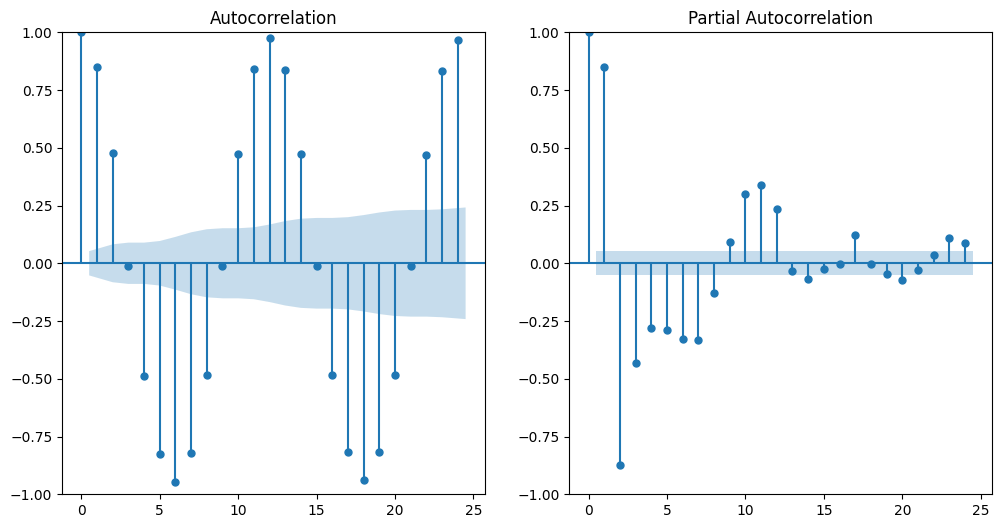

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(121)
plot_acf(df['Temperature - (Celsius)'], lags=24, ax=plt.gca())

# PACF Plot
plt.subplot(122)
plot_pacf(df['Temperature - (Celsius)'], lags=24, ax=plt.gca())

plt.show()


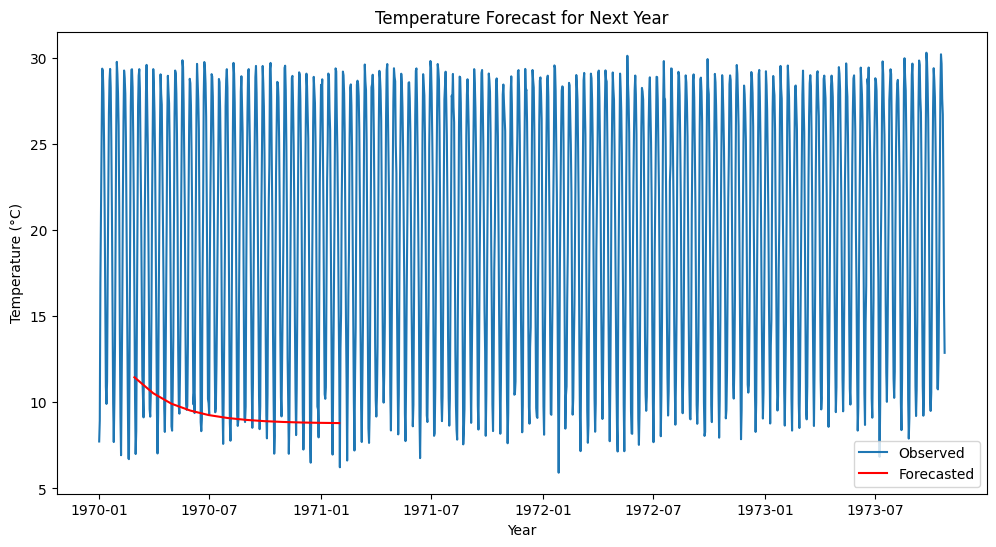

In [91]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['Temperature - (Celsius)'], order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=12)  # Forecast the next 12 months

# Plot forecasted temperatures
plt.figure(figsize=(12, 6))
plt.plot(df['Temperature - (Celsius)'], label='Observed')
plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], forecast, label='Forecasted', color='red')
plt.title('Temperature Forecast for Next Year')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [92]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df['Temperature - (Celsius)'][-12:], forecast))  # Compare last 12 months
print(f'RMSE: {rmse}')


RMSE: 14.102186039079129


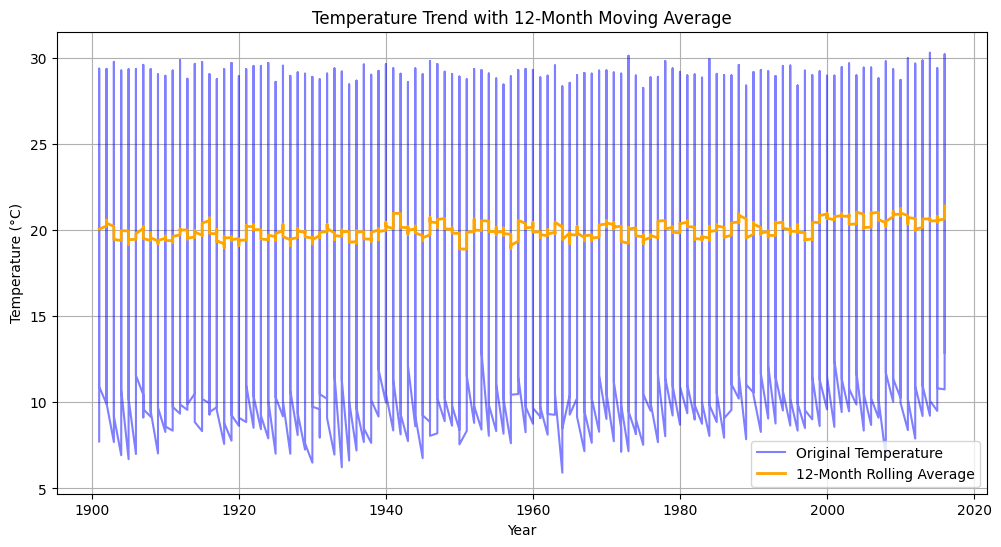

In [93]:
# Calculate 12-month rolling average (moving average)
df['Rolling_Avg'] = df['Temperature - (Celsius)'].rolling(window=12).mean()

# Plot the original data and rolling average
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Temperature - (Celsius)'], label='Original Temperature', color='blue', alpha=0.5)
plt.plot(df['Year'], df['Rolling_Avg'], label='12-Month Rolling Average', color='orange', linewidth=2)
plt.title('Temperature Trend with 12-Month Moving Average')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


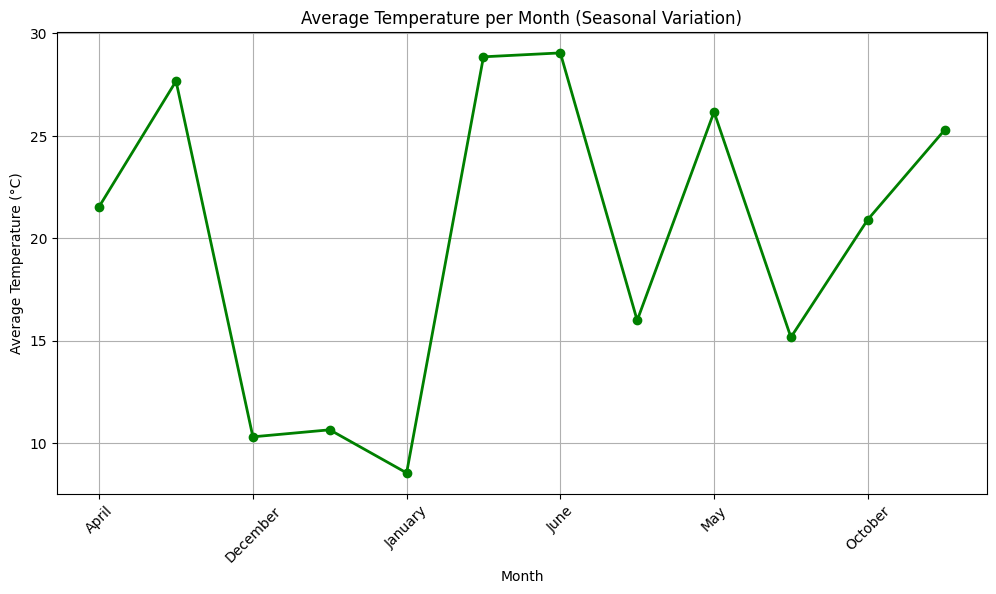

In [94]:
# Convert 'Month' column to a categorical type for grouping
df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month_name()

# Calculate the average temperature for each month
monthly_avg_temp = df.groupby('Month')['Temperature - (Celsius)'].mean().sort_index()

# Plot seasonal variation (average temperature by month)
plt.figure(figsize=(12, 6))
monthly_avg_temp.plot(kind='line', marker='o', color='green', linewidth=2)
plt.title('Average Temperature per Month (Seasonal Variation)')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


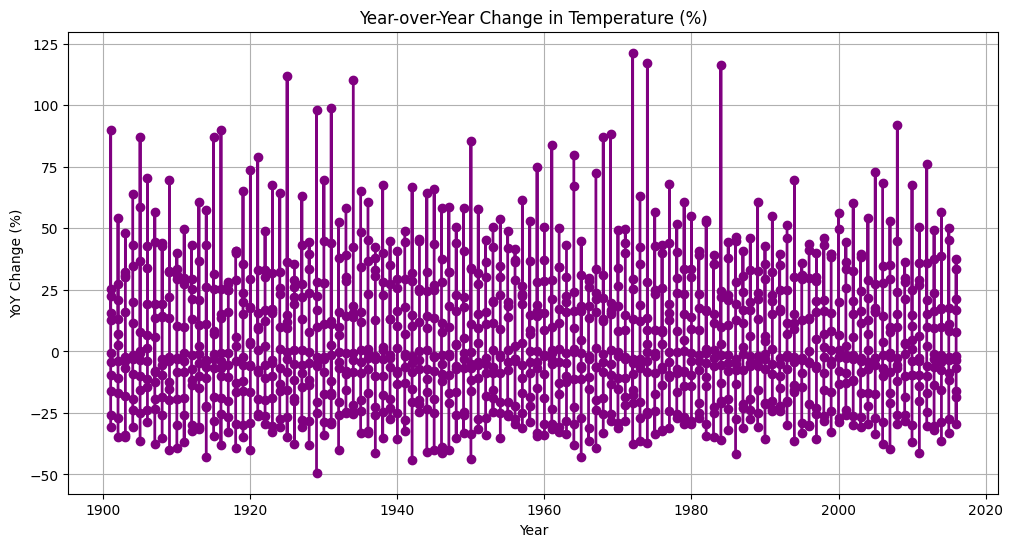

In [95]:
# Calculate the Year-over-Year (YoY) percentage change in temperature
df['YoY Change (%)'] = df.groupby('Year')['Temperature - (Celsius)'].pct_change() * 100

# Plot Year-over-Year Change
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['YoY Change (%)'], marker='o', color='purple', linestyle='-', linewidth=2)
plt.title('Year-over-Year Change in Temperature (%)')
plt.xlabel('Year')
plt.ylabel('YoY Change (%)')
plt.grid(True)
plt.show()


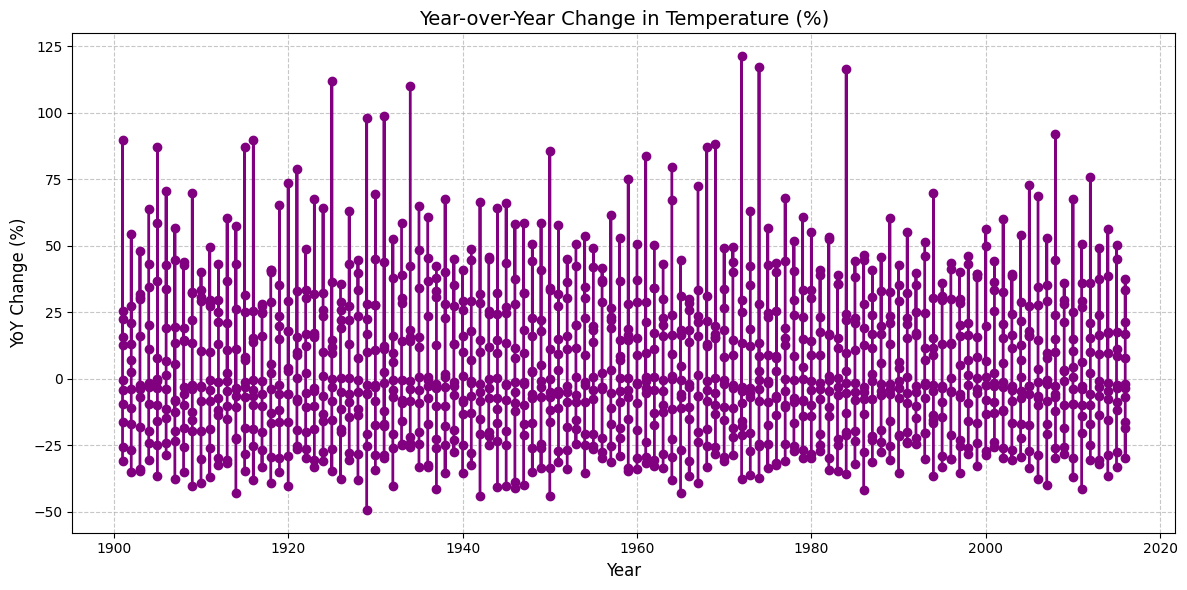

In [96]:
# Calculate the Year-over-Year (YoY) percentage change in temperature
df['YoY Change (%)'] = df.groupby('Year')['Temperature - (Celsius)'].pct_change() * 100

# Plot Year-over-Year Change with a line graph
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['YoY Change (%)'], color='purple', marker='o', linestyle='-', linewidth=2, markersize=6)

# Adding title and labels
plt.title('Year-over-Year Change in Temperature (%)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('YoY Change (%)', fontsize=12)

# Adding gridlines for better clarity
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [97]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Ensure the data is sorted by year
df_sorted = df.sort_values('Year')

# Prepare the time series data (Temperature as the series to predict)
temp_series = df_sorted.set_index('Year')['Temperature - (Celsius)']

# Train-test split (80% train, 20% test)
train_size = int(len(temp_series) * 0.8)
train, test = temp_series[:train_size], temp_series[train_size:]


In [98]:
# Fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))  # (p,d,q) parameters
fitted_model = model.fit()

# Make predictions for the test set
forecast = fitted_model.forecast(steps=len(test))


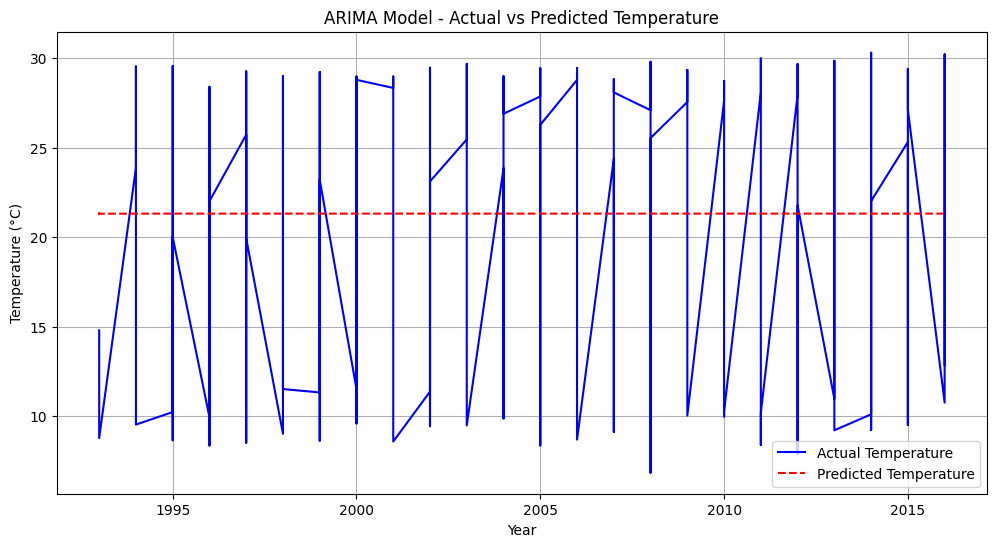

In [99]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Temperature', color='blue')
plt.plot(test.index, forecast, label='Predicted Temperature', color='red', linestyle='--')
plt.title('ARIMA Model - Actual vs Predicted Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


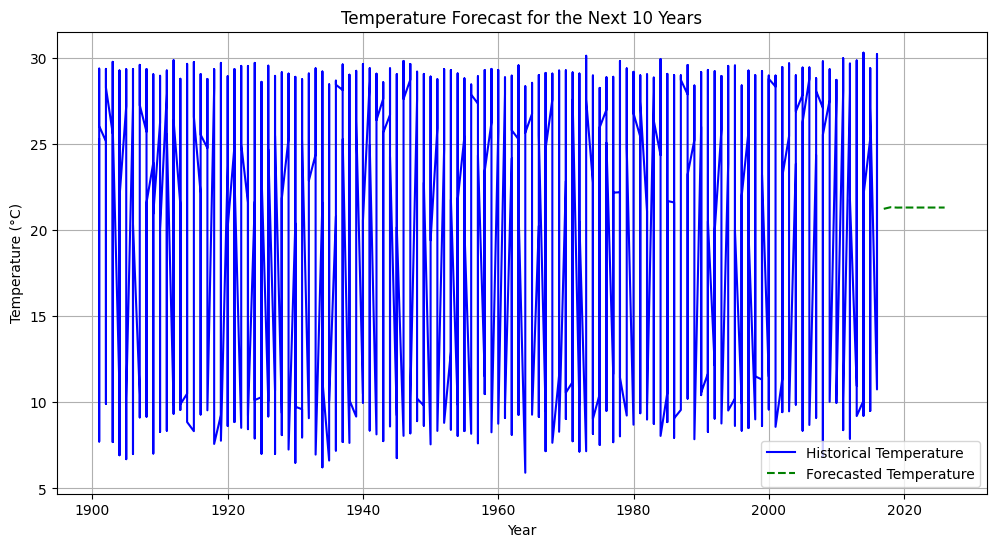

In [100]:
# Forecasting future temperatures (e.g., next 10 years)
future_years = 10
future_forecast = fitted_model.forecast(steps=future_years)

# Prepare future dates
last_year = temp_series.index[-1]
future_dates = [last_year + i for i in range(1, future_years + 1)]

# Plot the forecasted future temperatures
plt.figure(figsize=(12, 6))
plt.plot(temp_series.index, temp_series, label='Historical Temperature', color='blue')
plt.plot(future_dates, future_forecast, label='Forecasted Temperature', color='green', linestyle='--')
plt.title('Temperature Forecast for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()
